# Classify movie reviews: binary classification

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


In [16]:
#The IMDB dataset comes packaged with TensorFlow.
#It has already been preprocessed such that the reviews (sequences of words) have been 
#converted to sequences of integers, where each integer represents a specific word in a dictionary.

#The following code downloads the IMDB dataset to your machine (or uses a cached copy if you've already downloaded it)

#keras location is ~/.keras or c:\users\<username>\.keras

imdb = keras.datasets.imdb
import os
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, path=os.getcwd()+"/imdb.npz")
#The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. 
#The rare words are discarded to keep the size of the data manageable.

In [18]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
train_labels[0:5]

Training entries: 25000, labels: 25000


array([1, 0, 0, 1, 0])

In [19]:
print(train_data[0])
len(train_data[0]), len(train_data[1])
#Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


(218, 189)

In [20]:
#Convert the integers back to words
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [21]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [22]:
#Prepare the data
#One-hot-encode the arrays to convert them into vectors of 0s and 1s.
#For example, the sequence [3, 5] would become a 10,000-D vector that is
#all zeros except for indices 3 and 5, which are ones. Then, make this the
#first layer in our network—a Dense layer—that can handle floating point 
#vector data. This approach is memory intensive, though, requiring a 
#num_words * num_reviews size matrix.

#Alternatively, we can pad the arrays so they all have the same length,
#then create an integer tensor of shape num_examples * max_length. We can
#use an embedding layer capable of handling this shape as the first layer in our network.

#we will use the second approach.

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
value=word_index["<PAD>"],padding='post',maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
value=word_index["<PAD>"],padding='post',maxlen=256)

In [23]:
len(train_data[0]), len(train_data[1])
print(train_data[0])

(256, 256)

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [24]:
#Build the model
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


The layers are stacked sequentially to build the classifier:

- The first layer is an Embedding layer. This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).
- Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model can handle input of variable length, in the simplest way possible.
- This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
- The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level.

In [25]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy',metrics=['accuracy'])
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [26]:
history = model.fit(partial_x_train,partial_y_train,epochs=40,batch_size=512,validation_data=(x_val, y_val),verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 83us/step - loss: 0.6911 - acc: 0.6419 - val_loss: 0.6883 - val_acc: 0.7121
Epoch 2/40
15000/15000 [==============================] - 1s 52us/step - loss: 0.6828 - acc: 0.7443 - val_loss: 0.6768 - val_acc: 0.7153
Epoch 3/40
15000/15000 [==============================] - 1s 54us/step - loss: 0.6654 - acc: 0.7610 - val_loss: 0.6550 - val_acc: 0.7463
Epoch 4/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6357 - acc: 0.7661 - val_loss: 0.6227 - val_acc: 0.7805
Epoch 5/40
15000/15000 [==============================] - 1s 48us/step - loss: 0.5948 - acc: 0.8036 - val_loss: 0.5807 - val_acc: 0.7948
Epoch 6/40
15000/15000 [==============================] - 1s 50us/step - loss: 0.5467 - acc: 0.8247 - val_loss: 0.5359 - val_acc: 0.8087
Epoch 7/40
15000/15000 [==============================] - 1s 49us/step - loss: 0.4965 - acc: 0.8443 - val_loss: 0.4914 - val_acc

In [28]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 53us/step
[0.3391019322729111, 0.87184]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

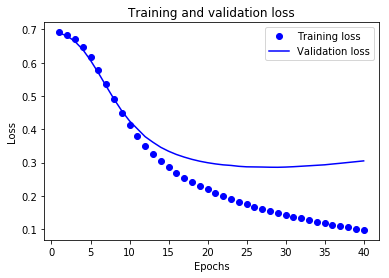

In [13]:
#Create a graph of accuracy and loss over time
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
_=plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
_=plt.plot(epochs, val_loss, 'b', label='Validation loss')
_=plt.title('Training and validation loss')
_=plt.xlabel('Epochs')
_=plt.ylabel('Loss')
_=plt.legend()
plt.show()

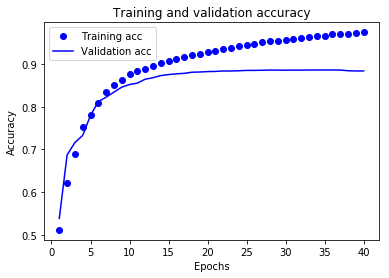

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

_=plt.plot(epochs, acc, 'bo', label='Training acc')
_=plt.plot(epochs, val_acc, 'b', label='Validation acc')
_=plt.title('Training and validation accuracy')
_=plt.xlabel('Epochs')
_=plt.ylabel('Accuracy')
_=plt.legend()

plt.show()

# RNNs for Hand-written digit recognition using Tensorflow


In [29]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib import rnn

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [30]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

In [31]:
# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [20]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, timesteps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

logits = RNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [21]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [22]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, training_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

Step 1, Minibatch Loss= 2.8262, Training Accuracy= 0.094
Step 200, Minibatch Loss= 2.1907, Training Accuracy= 0.273
Step 400, Minibatch Loss= 1.9862, Training Accuracy= 0.367
Step 600, Minibatch Loss= 1.7406, Training Accuracy= 0.445
Step 800, Minibatch Loss= 1.7421, Training Accuracy= 0.406
Step 1000, Minibatch Loss= 1.6670, Training Accuracy= 0.445
Step 1200, Minibatch Loss= 1.4512, Training Accuracy= 0.578
Step 1400, Minibatch Loss= 1.3966, Training Accuracy= 0.555
Step 1600, Minibatch Loss= 1.3251, Training Accuracy= 0.578
Step 1800, Minibatch Loss= 1.2412, Training Accuracy= 0.672
Step 2000, Minibatch Loss= 1.4653, Training Accuracy= 0.523
Step 2200, Minibatch Loss= 1.2625, Training Accuracy= 0.625
Step 2400, Minibatch Loss= 1.1086, Training Accuracy= 0.656
Step 2600, Minibatch Loss= 1.1803, Training Accuracy= 0.586
Step 2800, Minibatch Loss= 1.2068, Training Accuracy= 0.648
Step 3000, Minibatch Loss= 1.0966, Training Accuracy= 0.602
Step 3200, Minibatch Loss= 1.0938, Training Acc

# Bi-directional RNNs for Hand-written digit recognition using Tensorflow


In [23]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib import rnn

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

In [25]:

# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Define weights
weights = {
    # Hidden layer weights => 2*n_hidden because of forward + backward cells
    'out': tf.Variable(tf.random_normal([2*num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [26]:
def BiRNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, num_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, num_input)
    x = tf.unstack(x, timesteps, 1)

    # Define lstm cells with tensorflow
    # Forward direction cell
    lstm_fw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)
    # Backward direction cell
    lstm_bw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
    try:
        outputs, _, _ = rnn.static_bidirectional_rnn(lstm_fw_cell, lstm_bw_cell, x,
                                              dtype=tf.float32)
    except Exception: # Old TensorFlow version only returns outputs not states
        outputs = rnn.static_bidirectional_rnn(lstm_fw_cell, lstm_bw_cell, x,
                                        dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

logits = BiRNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

In [27]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


In [28]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, training_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

Step 1, Minibatch Loss= 2.9396, Training Accuracy= 0.094
Step 200, Minibatch Loss= 2.1005, Training Accuracy= 0.242
Step 400, Minibatch Loss= 1.8750, Training Accuracy= 0.328
Step 600, Minibatch Loss= 1.8338, Training Accuracy= 0.383
Step 800, Minibatch Loss= 1.6140, Training Accuracy= 0.531
Step 1000, Minibatch Loss= 1.5612, Training Accuracy= 0.453
Step 1200, Minibatch Loss= 1.4795, Training Accuracy= 0.547
Step 1400, Minibatch Loss= 1.5204, Training Accuracy= 0.523
Step 1600, Minibatch Loss= 1.4288, Training Accuracy= 0.531
Step 1800, Minibatch Loss= 1.3120, Training Accuracy= 0.562
Step 2000, Minibatch Loss= 1.3247, Training Accuracy= 0.555
Step 2200, Minibatch Loss= 1.1900, Training Accuracy= 0.578
Step 2400, Minibatch Loss= 1.2392, Training Accuracy= 0.609
Step 2600, Minibatch Loss= 1.2229, Training Accuracy= 0.609
Step 2800, Minibatch Loss= 1.0204, Training Accuracy= 0.711
Step 3000, Minibatch Loss= 0.8584, Training Accuracy= 0.766
Step 3200, Minibatch Loss= 1.0449, Training Acc

# Next word prediction using RNNs

https://github.com/roatienza/Deep-Learning-Experiments/blob/master/Experiments/Tensorflow/RNN/rnn_words.py

https://towardsdatascience.com/lstm-by-example-using-tensorflow-feb0c1968537

Next word prediction after n_input words learned from text file.
A story is automatically generated if the predicted word is fed back as input.

In [29]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn
import random
import collections
import time

In [30]:
start_time = time.time()
def elapsed(sec):
    if sec<60:
        return str(sec) + " sec"
    elif sec<(60*60):
        return str(sec/60) + " min"
    else:
        return str(sec/(60*60)) + " hr"

In [31]:
# Target log path
logs_path = 'logs/'
writer = tf.summary.FileWriter(logs_path)

# Text file containing words for training
training_file = 'belling_the_cat.txt'

In [32]:
def read_data(fname):
    with open(fname) as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    content = [word for i in range(len(content)) for word in content[i].split()]
    content = np.array(content)
    return content

training_data = read_data(training_file)
print("Loaded training data...")

Loaded training data...


In [33]:
def build_dataset(words):
    count = collections.Counter(words).most_common()
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return dictionary, reverse_dictionary

dictionary, reverse_dictionary = build_dataset(training_data)
vocab_size = len(dictionary)

In [34]:
# Parameters
learning_rate = 0.001
training_iters = 50000
display_step = 1000
#In this example, the LSTM feeds on a sequence of 3 integers (eg 1x3 vector of int) 
#and tries to predict the 4th word.

n_input = 3

# number of units in RNN cell
n_hidden = 512

# tf Graph input
x = tf.placeholder("float", [None, n_input, 1])
y = tf.placeholder("float", [None, vocab_size])

# RNN output node weights and biases
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, vocab_size]))
}
biases = {
    'out': tf.Variable(tf.random_normal([vocab_size]))
}


In [35]:
def RNN(x, weights, biases):

    # reshape to [1, n_input]
    x = tf.reshape(x, [-1, n_input])

    # Generate a n_input-element sequence of inputs
    # (eg. [had] [a] [general] -> [20] [6] [33])
    x = tf.split(x,n_input,1)

    # 2-layer LSTM, each layer has n_hidden units.
    # Average Accuracy= 95.20% at 50k iter
    rnn_cell = rnn.MultiRNNCell([rnn.BasicLSTMCell(n_hidden),rnn.BasicLSTMCell(n_hidden)])

    # 1-layer LSTM with n_hidden units but with lower accuracy.
    # Average Accuracy= 90.60% 50k iter
    # Uncomment line below to test but comment out the 2-layer rnn.MultiRNNCell above
    # rnn_cell = rnn.BasicLSTMCell(n_hidden)

    # generate prediction
    outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)

    # there are n_input outputs but
    # we only want the last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

pred = RNN(x, weights, biases)

In [36]:
# Loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

# Model evaluation
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()


In [38]:
# Launch the graph
with tf.Session() as session:
    session.run(init)
    step = 0
    offset = random.randint(0,n_input+1)
    end_offset = n_input + 1
    acc_total = 0
    loss_total = 0

    writer.add_graph(session.graph)

    while step < training_iters:
        # Generate a minibatch. Add some randomness on selection process.
        if offset > (len(training_data)-end_offset):
            offset = random.randint(0, n_input+1)

        symbols_in_keys = [ [dictionary[ str(training_data[i])]] for i in range(offset, offset+n_input) ]
        symbols_in_keys = np.reshape(np.array(symbols_in_keys), [-1, n_input, 1])

        symbols_out_onehot = np.zeros([vocab_size], dtype=float)
        symbols_out_onehot[dictionary[str(training_data[offset+n_input])]] = 1.0
        symbols_out_onehot = np.reshape(symbols_out_onehot,[1,-1])

        _, acc, loss, onehot_pred = session.run([optimizer, accuracy, cost, pred], \
                                                feed_dict={x: symbols_in_keys, y: symbols_out_onehot})
        loss_total += loss
        acc_total += acc
        if (step+1) % display_step == 0:
            print("Iter= " + str(step+1) + ", Average Loss= " + \
                  "{:.6f}".format(loss_total/display_step) + ", Average Accuracy= " + \
                  "{:.2f}%".format(100*acc_total/display_step))
            acc_total = 0
            loss_total = 0
            symbols_in = [training_data[i] for i in range(offset, offset + n_input)]
            symbols_out = training_data[offset + n_input]
            symbols_out_pred = reverse_dictionary[int(tf.argmax(onehot_pred, 1).eval())]
            print("%s - [%s] vs [%s]" % (symbols_in,symbols_out,symbols_out_pred))
        step += 1
        offset += (n_input+1)
    print("Optimization Finished!")
    print("Elapsed time: ", elapsed(time.time() - start_time))
    print("Run on command line.")
    print("\ttensorboard --logdir=%s" % (logs_path))
    print("Point your web browser to: http://localhost:6006/")
    while True:
        prompt = "%s words: " % n_input
        sentence = input(prompt)
        sentence = sentence.strip()
        words = sentence.split(' ')
        if len(words) != n_input:
            continue
        try:
            symbols_in_keys = [dictionary[str(words[i])] for i in range(len(words))]
            for i in range(32):
                keys = np.reshape(np.array(symbols_in_keys), [-1, n_input, 1])
                onehot_pred = session.run(pred, feed_dict={x: keys})
                onehot_pred_index = int(tf.argmax(onehot_pred, 1).eval())
                sentence = "%s %s" % (sentence,reverse_dictionary[onehot_pred_index])
                symbols_in_keys = symbols_in_keys[1:]
                symbols_in_keys.append(onehot_pred_index)
            print(sentence)
        except:
            print("Word not in dictionary")

Iter= 1000, Average Loss= 4.414061, Average Accuracy= 5.70%
['nobody', 'spoke', '.'] - [then] vs [then]
Iter= 2000, Average Loss= 2.868560, Average Accuracy= 22.20%
['all', 'very', 'well'] - [,] vs [general]
Iter= 3000, Average Loss= 2.461272, Average Accuracy= 36.50%
['the', 'neighbourhood', '.'] - [this] vs [to]
Iter= 4000, Average Loss= 2.258305, Average Accuracy= 39.80%
['she', 'was', 'about'] - [,] vs [,]
Iter= 5000, Average Loss= 1.830044, Average Accuracy= 53.60%
['cat', '.', 'by'] - [this] vs [this]
Iter= 6000, Average Loss= 1.754817, Average Accuracy= 57.90%
[',', 'and', 'attached'] - [by] vs [by]
Iter= 7000, Average Loss= 1.523224, Average Accuracy= 60.80%
['of', 'her', 'approach'] - [,] vs [,]
Iter= 8000, Average Loss= 1.295202, Average Accuracy= 66.00%
['the', 'sly', 'and'] - [treacherous] vs [treacherous]
Iter= 9000, Average Loss= 1.041020, Average Accuracy= 72.60%
['said', 'he', 'had'] - [a] vs [a]
Iter= 10000, Average Loss= 1.262483, Average Accuracy= 66.90%
['that', 'bu

# Stock market sentiment prediction using RNNs in TensorFlow

https://www.oreilly.com/ideas/introduction-to-lstms-with-tensorflow

In [39]:
import re
import string
from collections import Counter
import numpy as np

def preprocess_ST_message(text):
    """
    Preprocesses raw message data for analysis
    :param text: String. ST Message
    :return: List of Strings.  List of processed text tokes
    """
    # Define ST Regex Patters
    REGEX_PRICE_SIGN = re.compile(r'\$(?!\d*\.?\d+%)\d*\.?\d+|(?!\d*\.?\d+%)\d*\.?\d+\$')
    REGEX_PRICE_NOSIGN = re.compile(r'(?!\d*\.?\d+%)(?!\d*\.?\d+k)\d*\.?\d+')
    REGEX_TICKER = re.compile('\$[a-zA-Z]+')
    REGEX_USER = re.compile('\@\w+')
    REGEX_LINK = re.compile('https?:\/\/[^\s]+')
    REGEX_HTML_ENTITY = re.compile('\&\w+')
    REGEX_NON_ACSII = re.compile('[^\x00-\x7f]')
    REGEX_PUNCTUATION = re.compile('[%s]' % re.escape(string.punctuation.replace('<', '')).replace('>', ''))
    REGEX_NUMBER = re.compile(r'[-+]?[0-9]+')

    text = text.lower()

    # Replace ST "entitites" with a unique token
    text = re.sub(REGEX_TICKER, ' <TICKER> ', text)
    text = re.sub(REGEX_USER, ' <USER> ', text)
    text = re.sub(REGEX_LINK, ' <LINK> ', text)
    text = re.sub(REGEX_PRICE_SIGN, ' <PRICE> ', text)
    text = re.sub(REGEX_PRICE_NOSIGN, ' <NUMBER> ', text)
    text = re.sub(REGEX_NUMBER, ' <NUMBER> ', text)
    # Remove extraneous text data
    text = re.sub(REGEX_HTML_ENTITY, "", text)
    text = re.sub(REGEX_NON_ACSII, "", text)
    text = re.sub(REGEX_PUNCTUATION, "", text)
    # Tokenize and remove < and > that are not in special tokens
    words = " ".join(token.replace("<", "").replace(">", "")
                     if token not in ['<TICKER>', '<USER>', '<LINK>', '<PRICE>', '<NUMBER>']
                     else token
                     for token
                     in text.split())

    return words

In [40]:
def create_lookup_tables(words):
    """
    Create lookup tables for vocabulary
    :param words: Input list of words
    :return: A tuple of dicts.  The first dict maps a vocab word to and integeter
             The second maps an integer back to to the vocab word
    """
    word_counts = Counter(words)
    sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)
    int_to_vocab = {ii: word for ii, word in enumerate(sorted_vocab, 1)}
    vocab_to_int = {word: ii for ii, word in int_to_vocab.items()}

    return vocab_to_int, int_to_vocab

def encode_ST_messages(messages, vocab_to_int):
    """
    Encode ST Sentiment Labels
    :param messages: list of list of strings. List of message tokens
    :param vocab_to_int: mapping of vocab to idx
    :return: list of ints. Lists of encoded messages
    """
    messages_encoded = []
    for message in messages:
        messages_encoded.append([vocab_to_int[word] for word in message.split()])

    return np.array(messages_encoded)

def encode_ST_labels(labels):
    """
    Encode ST Sentiment Labels
    :param labels: Input list of labels
    :return: numpy array.  The encoded labels
    """
    return np.array([1 if sentiment == 'bullish' else 0 for sentiment in labels])


In [41]:
def drop_empty_messages(messages, labels):
    """
    Drop messages that are left empty after preprocessing
    :param messages: list of encoded messages
    :return: tuple of arrays. First array is non-empty messages, second array is non-empty labels
    """
    non_zero_idx = [ii for ii, message in enumerate(messages) if len(message) != 0]
    messages_non_zero = np.array([messages[ii] for ii in non_zero_idx])
    labels_non_zero = np.array([labels[ii] for ii in non_zero_idx])
    return messages_non_zero, labels_non_zero

def zero_pad_messages(messages, seq_len):
    """
    Zero Pad input messages
    :param messages: Input list of encoded messages
    :param seq_ken: Input int, maximum sequence input length
    :return: numpy array.  The encoded labels
    """
    messages_padded = np.zeros((len(messages), seq_len), dtype=int)
    for i, row in enumerate(messages):
        messages_padded[i, -len(row):] = np.array(row)[:seq_len]

    return np.array(messages_padded)

In [42]:
def train_val_test_split(messages, labels, split_frac, random_seed=None):
    """
    Zero Pad input messages
    :param messages: Input list of encoded messages
    :param labels: Input list of encoded labels
    :param split_frac: Input float, training split percentage
    :return: tuple of arrays train_x, val_x, test_x, train_y, val_y, test_y
    """
    # make sure that number of messages and labels allign
    assert len(messages) == len(labels)
    # random shuffle data
    if random_seed:
        np.random.seed(random_seed)
    shuf_idx = np.random.permutation(len(messages))
    messages_shuf = np.array(messages)[shuf_idx] 
    labels_shuf = np.array(labels)[shuf_idx]

    #make splits
    split_idx = int(len(messages_shuf)*split_frac)
    train_x, val_x = messages_shuf[:split_idx], messages_shuf[split_idx:]
    train_y, val_y = labels_shuf[:split_idx], labels_shuf[split_idx:]

    test_idx = int(len(val_x)*0.5)
    val_x, test_x = val_x[:test_idx], val_x[test_idx:]
    val_y, test_y = val_y[:test_idx], val_y[test_idx:]

    return train_x, val_x, test_x, train_y, val_y, test_y
    
def get_batches(x, y, batch_size=100):
    """
    Batch Generator for Training
    :param x: Input array of x data
    :param y: Input array of y data
    :param batch_size: Input int, size of batch
    :return: generator that returns a tuple of our x batch and y batch
    """
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

# Modeling Stock Market Sentiment with LSTMs and TensorFlow

In this tutorial, we will build a Long Short Term Memory (LSTM) Network to predict the stock market sentiment based on a comment about the market.

## Setup

We will use the following libraries for our analysis:

* numpy - numerical computing library used to work with our data
* pandas - data analysis library used to read in our data from csv
* tensorflow - deep learning framework used for modeling

We will also be using the python Counter object for counting our vocabulary items and we have a util module that extracts away a lot of the details of our data processing. Please read through the util.py to get a better understanding of how to preprocess the data for analysis.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import utils as utl
from collections import Counter

## Processing Data

We will train the model using messages tagged with SPY, the S&P 500 index fund, from [StockTwits.com](https://www.stocktwits.com). StockTwits is a social media network for traders and investors to share their views about the stock market. When a user posts a message, they tag the relevant stock ticker ($SPY in our case) and have the option to tag the messages with their sentiment – “bullish” if they believe the stock will go up and “bearish” if they believe the stock will go down.

Our dataset consists of approximately 100,000 messages posted in 2017 that are tagged with $SPY where the user indicated their sentiment. Before we get to our LSTM Network we have to perform some processing on our data to get it ready for modeling.

#### Read and View Data

First we simply read in our data using pandas, pull out our message and sentiment data into numpy arrays. Let's also take a look at a few samples to get familiar with the data set.

In [2]:
# read data from csv file
data = pd.read_csv("data/StockTwits_SPY_Sentiment_2017.gz",
                   encoding="utf-8",
                   compression="gzip",
                   index_col=0)

# get messages and sentiment labels
messages = data.message.values
labels = data.sentiment.values

# View sample of messages with sentiment

for i in range(10):
    print("Messages: {}...".format(messages[i]),
          "Sentiment: {}".format(labels[i]))

Messages: $SPY crazy day so far!... Sentiment: bearish
Messages: $SPY Will make a new ATH this week. Watch it!... Sentiment: bullish
Messages: $SPY $DJIA white elephant in room is $AAPL. Up 14% since election. Strong headwinds w/Trump trade & Strong dollar. How many 7's do you see?... Sentiment: bearish
Messages: $SPY blocks above. We break above them We should push to double top... Sentiment: bullish
Messages: $SPY Nothing happening in the market today, guess I'll go to the store and spend some $.... Sentiment: bearish
Messages: $SPY What an easy call. Good jobs report: good economy, markets go up.  Bad jobs report: no more rate hikes, markets go up.  Win-win.... Sentiment: bullish
Messages: $SPY BS market.... Sentiment: bullish
Messages: $SPY this rally all the cheerleaders were screaming about this morning is pretty weak. I keep adding 2 my short at all spikes... Sentiment: bearish
Messages: $SPY Dollar ripping higher!... Sentiment: bearish
Messages: $SPY no reason to go down !... S

#### Preprocess Messages

Working with raw text data often requires preprocessing the text in some fashion to normalize for context. In our case we want to normalize for known unique "entities" that appear within messages that carry a similar contextual meaning when analyzing sentiment. This means we want to replace references to specific stock tickers, user names, url links or numbers with a special token identifying the "entity". Here we will also make everything lower case and remove punctuation.

In [3]:
messages = np.array([utl.preprocess_ST_message(message) for message in messages])

#### Generate Vocab to Index Mapping

To work with raw text we need some encoding from words to numbers for our algorithm to work with the inputs. The first step of doing this is keeping a collection of our full vocabularly and creating a mapping of each word to a unique index. We will use this word to index mapping in a little bit to prep out messages for analysis. 

Note that in practice we may want to only include the vocabularly from our training set here to account for the fact that we will likely see new words when our model is out in the wild when we are assessing the results on our validation and test sets. Here, for simplicity and demonstration purposes, we will use our entire data set.

In [4]:
full_lexicon = " ".join(messages).split()
vocab_to_int, int_to_vocab = utl.create_lookup_tables(full_lexicon)

#### Check Message Lengths

We will also want to get a sense of the distribution of the length of our inputs. We check for the longest and average messages. We will need to make our input length uniform to feed the data into our model so later we will have some decisions to make about possibly truncating some of the longer messages if they are too long. We also notice that one message has no content remaining after we preprocessed the data, so we will remove this message from our data set.

In [5]:
messages_lens = Counter([len(x) for x in messages])
print("Zero-length messages: {}".format(messages_lens[0]))
print("Maximum message length: {}".format(max(messages_lens)))
print("Average message length: {}".format(np.mean([len(x) for x in messages])))

Zero-length messages: 1
Maximum message length: 244
Average message length: 78.21856920395598


In [6]:
messages, labels = utl.drop_empty_messages(messages, labels)

#### Encode Messages and Labels

Earlier we mentioned that we need to "translate" our text to number for our algorithm to take in as inputs. We call this translation an encoding. We encode our messages to sequences of numbers where each nummber is the word index from the mapping we made earlier. The phrase "I am bullish" would now look something like [1, 234, 5345] where each number is the index for the respective word in the message. For our sentiment labels we will simply encode "bearish" as 0 and "bullish" as 1.

In [7]:
messages = utl.encode_ST_messages(messages, vocab_to_int)
labels = utl.encode_ST_labels(labels)

#### Pad Messages

The last thing we need to do is make our message inputs the same length. In our case, the longest message is 244 words. LSTMs can usually handle sequence inputs up to 500 items in length so we won't truncate any of the messages here. We need to Zero Pad the rest of the messages that are shorter. We will use a left padding that will pad all of the messages that are shorter than 244 words with 0s at the beginning. So our encoded "I am bullish" messages goes from [1, 234, 5345] (length 3) to [0, 0, 0, 0, 0, 0, ... , 0, 0, 1, 234, 5345] (length 244).

In [8]:
messages = utl.zero_pad_messages(messages, seq_len=244)

#### Train, Test, Validation Split

The last thing we do is split our data into tranining, validation and test sets and observe the size of each set.

In [9]:
train_x, val_x, test_x, train_y, val_y, test_y = utl.train_val_test_split(messages, labels, split_frac=0.80)

print("Data Set Size")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

Data Set Size
Train set: 		(77572, 244) 
Validation set: 	(9697, 244) 
Test set: 		(9697, 244)


## Building and Training our LSTM Network

In this section we will define a number of functions that will construct the items in our network. We will then use these functions to build and train our network.

#### Model Inputs

Here we simply define a function to build TensorFlow Placeholders for our message sequences, our labels and a variable called keep probability associated with drop out (we will talk more about this later). 

In [10]:
def model_inputs():
    """
    Create the model inputs
    """
    inputs_ = tf.placeholder(tf.int32, [None, None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name='labels')
    keep_prob_ = tf.placeholder(tf.float32, name='keep_prob')
    
    return inputs_, labels_, keep_prob_

#### Embedding Layer

In TensorFlow the word embeddings are represented as a vocabulary size x embedding size matrix and will learn these weights during our training process. The embedding lookup is then just a simple lookup from our embedding matrix based on the index of the current word.

In [11]:
def build_embedding_layer(inputs_, vocab_size, embed_size):
    """
    Create the embedding layer
    """
    embedding = tf.Variable(tf.random_uniform((vocab_size, embed_size), -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs_)
    
    return embed

#### LSTM Layers

TensorFlow makes it extremely easy to build LSTM Layers and stack them on top of each other. We represent each LSTM layer as a BasicLSTMCell and keep these in a list to stack them together later. Here we will define a list with our LSTM layer sizes and the number of layers. 

We then take each of these LSTM layers and wrap them in a Dropout Layer. Dropout is a regularization technique using in Neural Networks in which any individual node has a probability of “dropping out” of the network during a given iteration of learning. The makes the model more generalizable by ensuring that it is not too dependent on any given nodes. 

Finally, we stack these layers using a MultiRNNCell, generate a zero initial state and connect our stacked LSTM layer to our word embedding inputs using dynamic_rnn. Here we track the output and the final state of the LSTM cell, which we will need to pass between mini-batches during training.

In [12]:
def build_lstm_layers(lstm_sizes, embed, keep_prob_, batch_size):
    """
    Create the LSTM layers
    """
    lstms = [tf.contrib.rnn.BasicLSTMCell(size) for size in lstm_sizes]
    # Add dropout to the cell
    drops = [tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_) for lstm in lstms]
    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell(drops)
    # Getting an initial state of all zeros
    initial_state = cell.zero_state(batch_size, tf.float32)
    
    lstm_outputs, final_state = tf.nn.dynamic_rnn(cell, embed, initial_state=initial_state)
    
    return initial_state, lstm_outputs, cell, final_state

#### Loss Function and Optimizer

First, we get our predictions by passing the final output of the LSTM layers to a sigmoid activation function via a Tensorflow fully connected layer.  we only care to use the final output for making predictions so we pull this out using the [: , -1] indexing on our LSTM outputs and pass it through a sigmoid activation function to make the predictions. We pass then pass these predictions to our mean squared error loss function and use the Adadelta Optimizer to minimize the loss.

In [13]:
def build_cost_fn_and_opt(lstm_outputs, labels_, learning_rate):
    """
    Create the Loss function and Optimizer
    """
    predictions = tf.contrib.layers.fully_connected(lstm_outputs[:, -1], 1, activation_fn=tf.sigmoid)
    loss = tf.losses.mean_squared_error(labels_, predictions)
    optimzer = tf.train.AdadeltaOptimizer(learning_rate).minimize(loss)
    
    return predictions, loss, optimzer

#### Accuracy

Finally, we define our accuracy metric for assessing the model performance across our training, validation and test sets. Even though accuracy is just a calculation based on results, everything in TensorFlow is part of a Computation Graph. Therefore, we need to define our loss and accuracy nodes in the context of the rest of our network graph.

In [14]:
def build_accuracy(predictions, labels_):
    """
    Create accuracy
    """
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    return accuracy

#### Training

We are finally ready to build and train our LSTM Network! First, we call each of our each of the functions we have defined to construct the network. Then we define a Saver to be able to write our model to disk to load for future use. Finally, we call a Tensorflow Session to train the model over a predefined number of epochs using mini-batches. At the end of each epoch we will print the loss, training accuracy and validation accuracy to monitor the results as we train.

In [15]:
def build_and_train_network(lstm_sizes, vocab_size, embed_size, epochs, batch_size,
                            learning_rate, keep_prob, train_x, val_x, train_y, val_y):
    
    inputs_, labels_, keep_prob_ = model_inputs()
    embed = build_embedding_layer(inputs_, vocab_size, embed_size)
    initial_state, lstm_outputs, lstm_cell, final_state = build_lstm_layers(lstm_sizes, embed, keep_prob_, batch_size)
    predictions, loss, optimizer = build_cost_fn_and_opt(lstm_outputs, labels_, learning_rate)
    accuracy = build_accuracy(predictions, labels_)
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        n_batches = len(train_x)//batch_size
        for e in range(epochs):
            state = sess.run(initial_state)
            
            train_acc = []
            for ii, (x, y) in enumerate(utl.get_batches(train_x, train_y, batch_size), 1):
                feed = {inputs_: x,
                        labels_: y[:, None],
                        keep_prob_: keep_prob,
                        initial_state: state}
                loss_, state, _,  batch_acc = sess.run([loss, final_state, optimizer, accuracy], feed_dict=feed)
                train_acc.append(batch_acc)
                
                if (ii + 1) % n_batches == 0:
                    
                    val_acc = []
                    val_state = sess.run(lstm_cell.zero_state(batch_size, tf.float32))
                    for xx, yy in utl.get_batches(val_x, val_y, batch_size):
                        feed = {inputs_: xx,
                                labels_: yy[:, None],
                                keep_prob_: 1,
                                initial_state: val_state}
                        val_batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                        val_acc.append(val_batch_acc)
                    
                    print("Epoch: {}/{}...".format(e+1, epochs),
                          "Batch: {}/{}...".format(ii+1, n_batches),
                          "Train Loss: {:.3f}...".format(loss_),
                          "Train Accruacy: {:.3f}...".format(np.mean(train_acc)),
                          "Val Accuracy: {:.3f}".format(np.mean(val_acc)))
    
        saver.save(sess, "checkpoints/sentiment.ckpt")

Next we define our model hyper parameters. We will build a 2 Layer LSTM Newtork with hidden layer sizes of 128 and 64 respectively. We will use an embedding size of 300 and train over 50 epochs with mini-batches of size 256. We will use an initial learning rate of 0.1, though our Adadelta Optimizer will adapt this over time, and a keep probability of 0.5. 

In [16]:
# Define Inputs and Hyperparameters
lstm_sizes = [128, 64]
vocab_size = len(vocab_to_int) + 1 #add one for padding
embed_size = 300
epochs = 50
batch_size = 256
learning_rate = 0.1
keep_prob = 0.5

and now we train!

In [17]:
with tf.Graph().as_default():
    build_and_train_network(lstm_sizes, vocab_size, embed_size, epochs, batch_size,
                            learning_rate, keep_prob, train_x, val_x, train_y, val_y)

Epoch: 1/50... Batch: 303/303... Train Loss: 0.247... Train Accruacy: 0.562... Val Accuracy: 0.578
Epoch: 2/50... Batch: 303/303... Train Loss: 0.245... Train Accruacy: 0.583... Val Accuracy: 0.596
Epoch: 3/50... Batch: 303/303... Train Loss: 0.247... Train Accruacy: 0.597... Val Accuracy: 0.617
Epoch: 4/50... Batch: 303/303... Train Loss: 0.240... Train Accruacy: 0.610... Val Accuracy: 0.627
Epoch: 5/50... Batch: 303/303... Train Loss: 0.238... Train Accruacy: 0.620... Val Accuracy: 0.632
Epoch: 6/50... Batch: 303/303... Train Loss: 0.234... Train Accruacy: 0.632... Val Accuracy: 0.642
Epoch: 7/50... Batch: 303/303... Train Loss: 0.230... Train Accruacy: 0.636... Val Accuracy: 0.648
Epoch: 8/50... Batch: 303/303... Train Loss: 0.227... Train Accruacy: 0.641... Val Accuracy: 0.653
Epoch: 9/50... Batch: 303/303... Train Loss: 0.223... Train Accruacy: 0.646... Val Accuracy: 0.656
Epoch: 10/50... Batch: 303/303... Train Loss: 0.221... Train Accruacy: 0.652... Val Accuracy: 0.659
Epoch: 11

## Testing our Network

The last thing we want to do is check the model accuracy on our testing data to make sure it is in line with expecations. We build the Computational Graph just like we did before, however, now instead of training we restore our saved model from our checkpoint directory and then run our test data through the model. 

In [18]:
def test_network(model_dir, batch_size, test_x, test_y):
    
    inputs_, labels_, keep_prob_ = model_inputs()
    embed = build_embedding_layer(inputs_, vocab_size, embed_size)
    initial_state, lstm_outputs, lstm_cell, final_state = build_lstm_layers(lstm_sizes, embed, keep_prob_, batch_size)
    predictions, loss, optimizer = build_cost_fn_and_opt(lstm_outputs, labels_, learning_rate)
    accuracy = build_accuracy(predictions, labels_)
    
    saver = tf.train.Saver()
    
    test_acc = []
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint(model_dir))
        test_state = sess.run(lstm_cell.zero_state(batch_size, tf.float32))
        for ii, (x, y) in enumerate(utl.get_batches(test_x, test_y, batch_size), 1):
            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob_: 1,
                    initial_state: test_state}
            batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
            test_acc.append(batch_acc)
        print("Test Accuracy: {:.3f}".format(np.mean(test_acc)))

In [19]:
with tf.Graph().as_default():
    test_network('checkpoints', batch_size, test_x, test_y)

INFO:tensorflow:Restoring parameters from checkpoints/sentiment.ckpt
Test Accuracy: 0.717
